# EDA(数据探索分析)

In [1]:
#导入pandas与numpy工具包
import pandas as pd
import numpy as np

#导入绘图工具包
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns #要注意的是一旦导入了seaborn，matplotlib的默认作图风格就会被覆盖成seaborn的格式

In [2]:
#读取训练集和测试集
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#先看一下训练集中的总体生存情况，
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

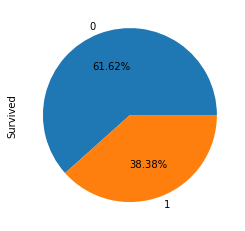

In [5]:
# 饼图显示生还/死亡乘客对比
train['Survived'].value_counts().plot.pie(autopct='%1.2f%%')        #pie表示饼图,可以显示比例，用起来比较简单

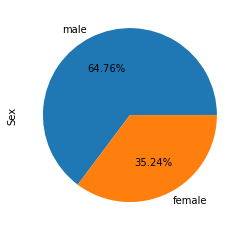

In [6]:
#性别分布
train['Sex'].value_counts().plot.pie(autopct='%1.2f%%')

# 性别

In [7]:
#查看以性别区分的生存情况
train.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

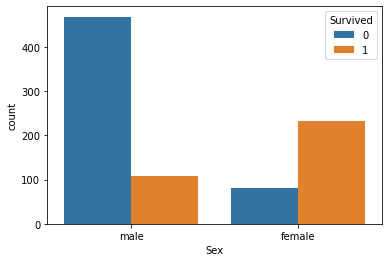

In [8]:
#性别的生存情况，
sns.countplot(x='Sex', hue='Survived', data=train)               #countplot表示estimate plot，即统计该类别的数量,x和y中只能选择一个，因为本身就是计数的画图

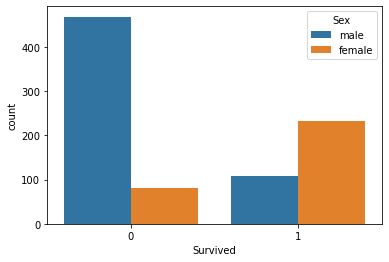

In [9]:
sns.countplot(x='Survived', hue='Sex', data=train) 

seaborn官方教程：http://seaborn.pydata.org/tutorial/categorical.html

女性乘客的生存率明显比男性高

# 船舱等级

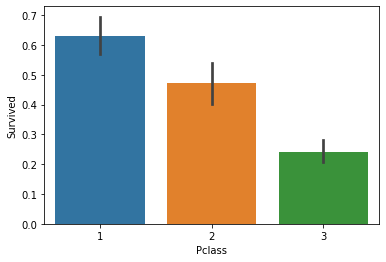

In [10]:
#查看船舱的生存率，明显船舱等级越高，生存率越高
sns.barplot(x='Pclass', y= 'Survived',data=train)             #barplot就是表示直方图，这里要注意，由于有了y坐标，所以这里y默认的是x中分类的平均值   
#所有的图都可以用标准形式：sns.catplot(x='Pclass', y= 'Survived', kind='xx',data=train)的格式

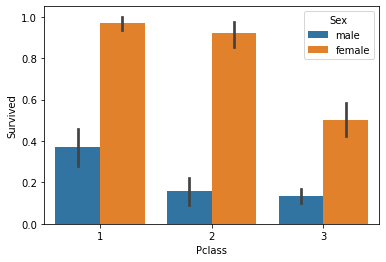

In [11]:
#查看男女在不同等级船舱的生存率（这里的纵坐标是平均值代替），总体女性乘客生存率远远高于男性
sns.barplot(x='Pclass', y= 'Survived', hue='Sex',data=train)

船舱对生存率也有很重要的影响

# 年龄

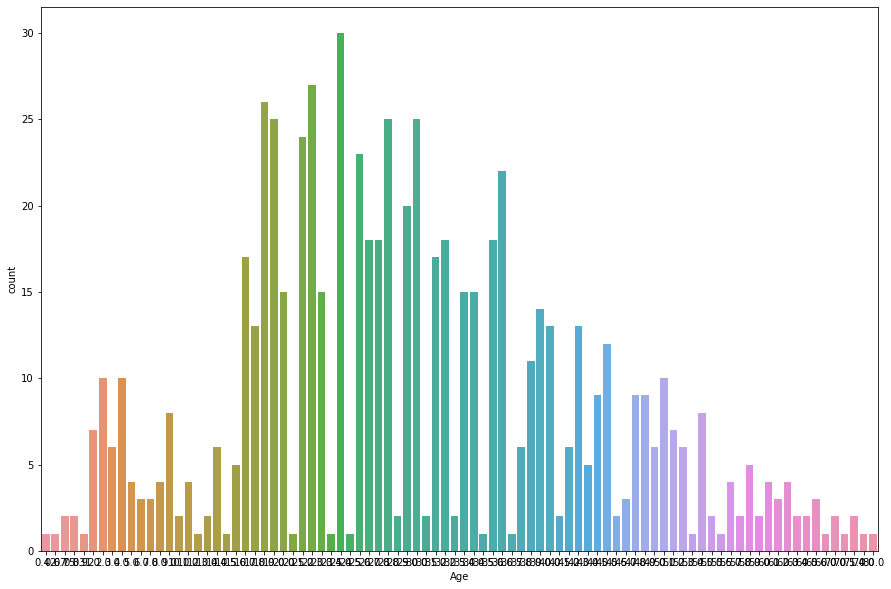

In [12]:
#查看年龄对生存的影响，由于年龄是连续的变量，先看年龄的分布
plt.figure(figsize=(15, 10))
sns.countplot(x='Age',data=train)  #countplot没有bins变量

这个图不太好看，因为bins没法定义，所以下面换成matplotlib的hist画出来

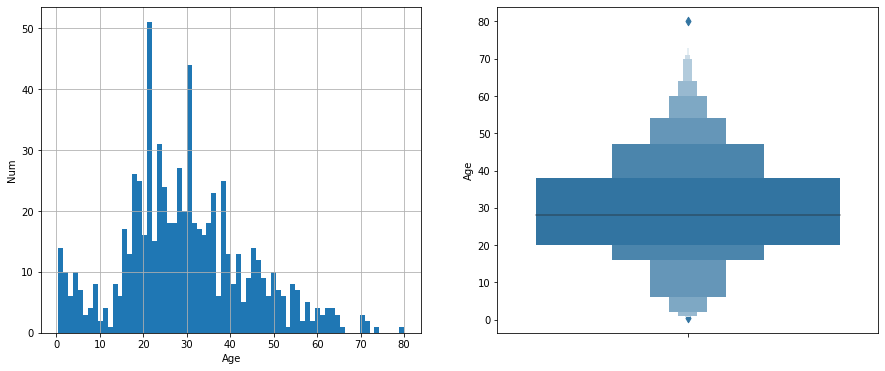

In [13]:
#用matplotlib画
plt.figure(figsize=(15, 6))
plt.subplot(121)
train['Age'].hist(bins=70)     #hist默认y轴是计数的
plt.xlabel('Age')
plt.ylabel('Num')

#boxplot是用来统计分布的,越宽则表示越密集,横线表示中位数，上下表示1/4，3/4

plt.subplot(122)
sns.boxenplot(x=train['Age'], orient='v', showfliers=True)                 #表示不现实异常值

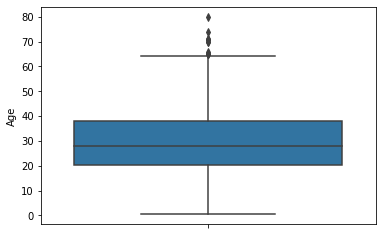

In [14]:
sns.boxplot(x=train['Age'], orient='v', showfliers=True)    

C:\Users\Administrator.000\anaconda3\envs\tf2\lib\site-packages\seaborn\categorical.py:1311: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\Administrator.000\anaconda3\envs\tf2\lib\site-packages\seaborn\categorical.py:1315: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


<Figure size 1080x432 with 0 Axes>

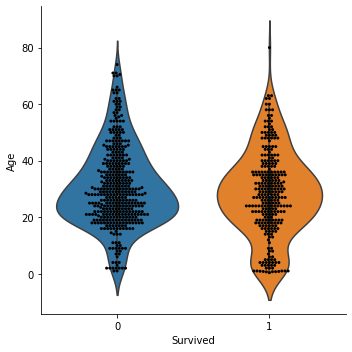

In [15]:
#查看不同年龄的生存情况分布
plt.figure(figsize=(15,6))
g = sns.catplot(x='Survived', y='Age', kind='violin', data=train)              #越宽表示分布越密集
sns.swarmplot(x="Survived", y="Age", color="k", size=3, data=train, ax=g.ax)  

其实还是可以看出来儿童的生存率还是很高的

C:\Users\Administrator.000\anaconda3\envs\tf2\lib\site-packages\seaborn\categorical.py:2971: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


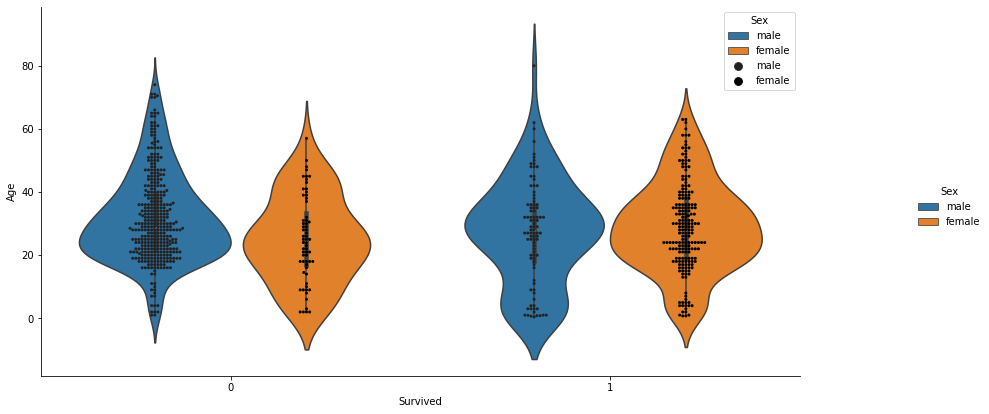

In [16]:
g = sns.catplot(x='Survived', y='Age', hue='Sex', kind='violin', data=train)
#设置图片尺寸
g.fig.set_size_inches(15, 6)     
sns.swarmplot(x="Survived", y="Age",hue='Sex', color="k", size=3, split=True, data=train, ax=g.ax)  

这个图也可以女性乘客存活的比例远高于男性。

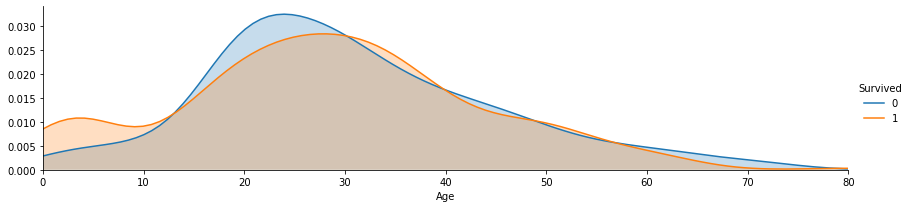

In [17]:
# 换一种图形来对比一下
facet = sns.FacetGrid(train, hue="Survived",aspect=4)        #添加一个网格图
facet.map(sns.kdeplot,'Age',shade= True)                     #画出age的kernel density estimation
facet.set(xlim=(0, train['Age'].max()))                       #设置参数
facet.add_legend()                                            #添加标签

我们再来统计一下各年龄段的生存率(部分缺失值还没有填充)

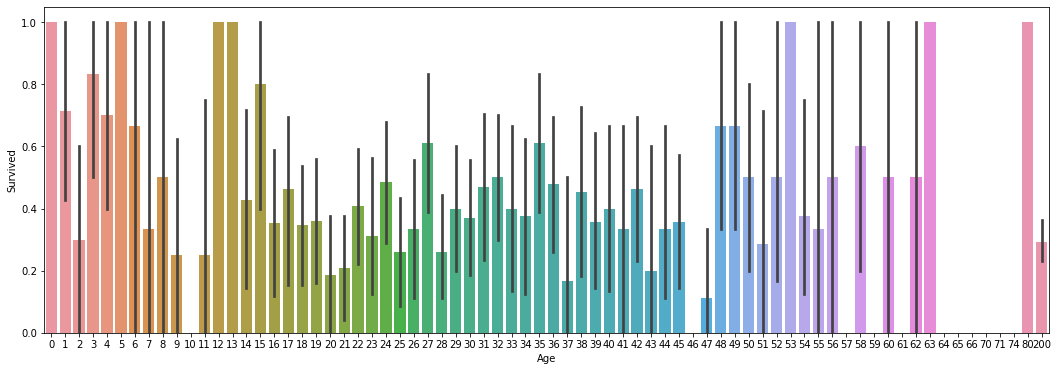

In [18]:
#有误差棒，影响观看
plt.figure(figsize=(18, 6))
train1 = train
train1['Age'] = train['Age'].fillna(200)
train1['Age'] = train1['Age'].astype(int)
sns.barplot(x='Age',y='Survived', data=train1)

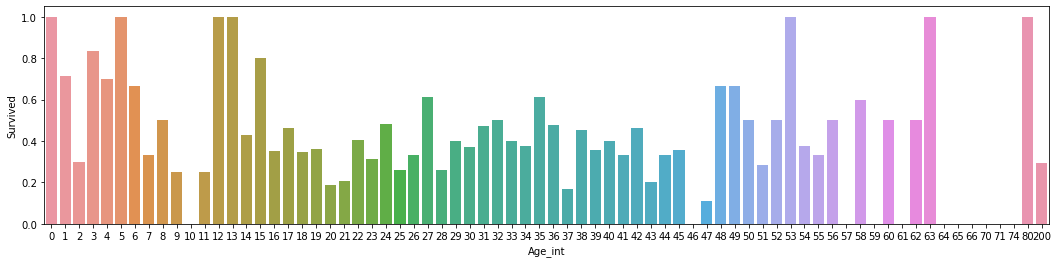

In [19]:
train2 = train

fig, axis1 = plt.subplots(1,1,figsize=(18,4))
#if train["Age"].isnull() == True:
train2["Age_int"] = train2["Age"].astype(int)
average_age = train2[["Age_int", "Survived"]].groupby(['Age_int'],as_index=False).mean()
sns.barplot(x='Age_int', y='Survived', data=average_age)

# SibSp-船上的兄弟姐妹/配偶

In [20]:
#查看数据分布
train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [21]:
test['SibSp'].value_counts()

0    283
1    110
2     14
4      4
3      4
8      2
5      1
Name: SibSp, dtype: int64

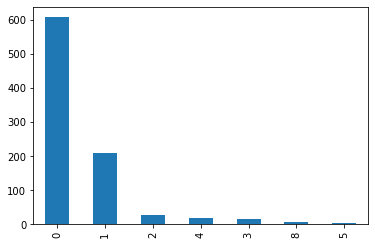

In [22]:
#直方图,数量统计
train['SibSp'].value_counts().plot.bar()

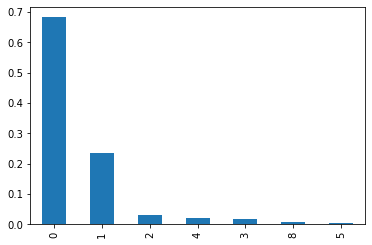

In [23]:
#直方图,比例统计
train['SibSp'].value_counts(sorted).plot.bar()

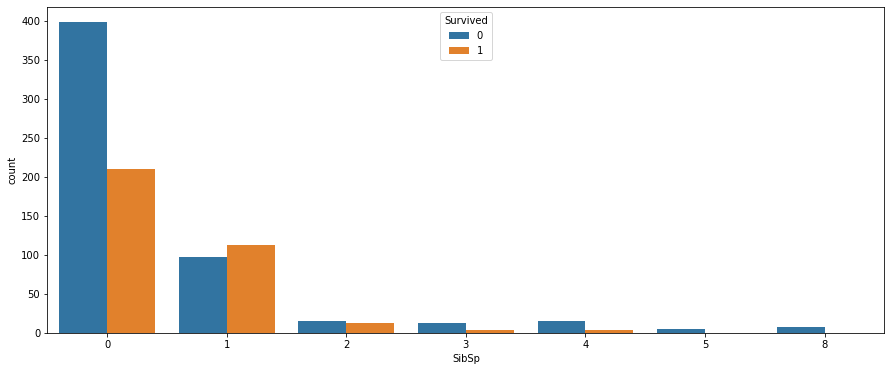

In [24]:
#SibSp和生存的关系
plt.figure(figsize=(15, 6))
sns.countplot(x='SibSp', hue='Survived', data=train)

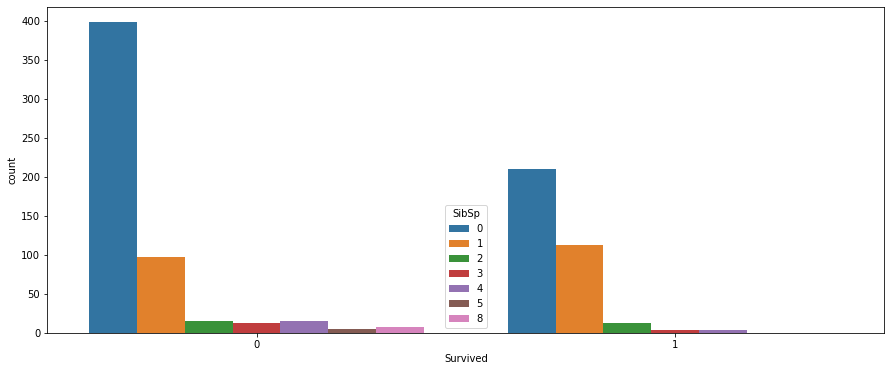

In [25]:
plt.figure(figsize=(15, 6))
sns.countplot(x='Survived', hue='SibSp', data=train)

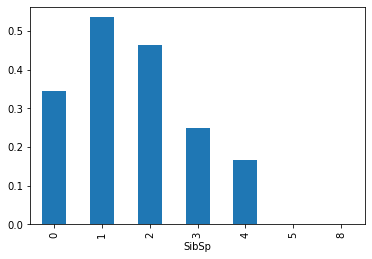

In [26]:
train.groupby(['SibSp'])['Survived'].mean().plot.bar()

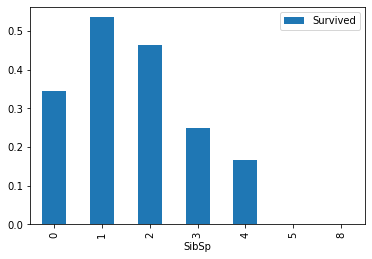

In [27]:
train[['SibSp','Survived']].groupby(['SibSp']).mean().plot.bar()

同代人数为1.2的生存率高一些

# Parch-父母以及小孩的数量

In [28]:
train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [29]:
test['Parch'].value_counts()

0    324
1     52
2     33
3      3
9      2
4      2
6      1
5      1
Name: Parch, dtype: int64

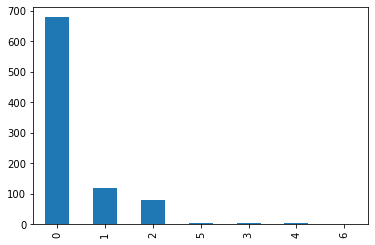

In [30]:
train['Parch'].value_counts().plot.bar()  #画图方便，但是不好调整图的大小

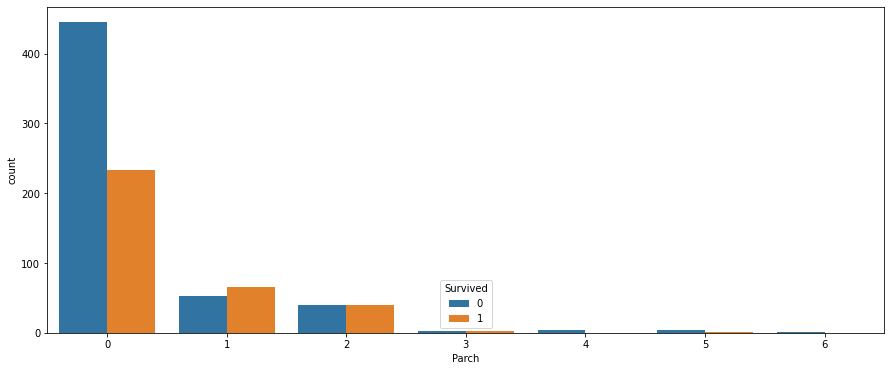

In [31]:
plt.figure(figsize=(15, 6))
sns.countplot(x="Parch", hue="Survived", data=train)

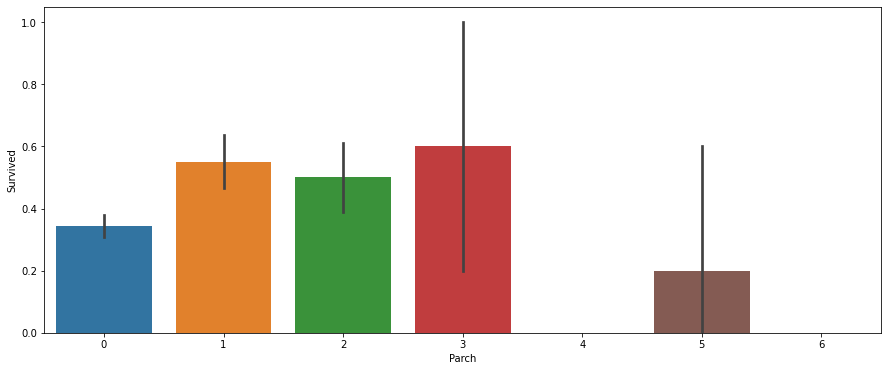

In [32]:
plt.figure(figsize=(15, 6))
sns.barplot(x='Parch', y='Survived', data=train)

没有发现很特别的规律，parch为1，3的生存率略高一些

# Fare-船票花费

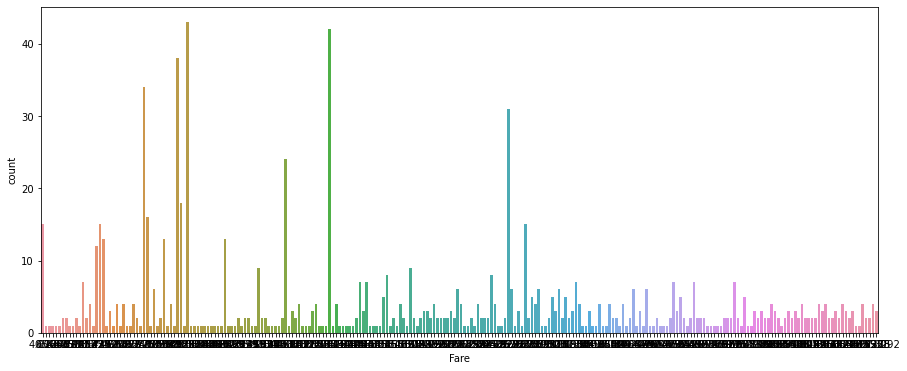

In [33]:
# 查看数据分布柱状图
plt.figure(figsize=(15,6))
sns.countplot(x='Fare', data=train)

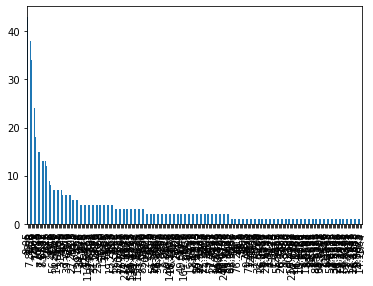

In [34]:
train['Fare'].value_counts().plot.bar()  #看不出来

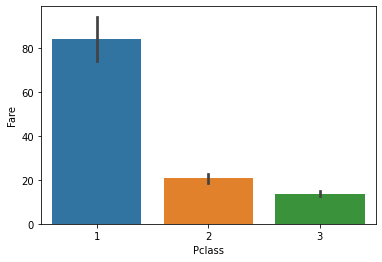

In [35]:
sns.barplot(x='Pclass',y='Fare',data=train)   #舱位价格分布

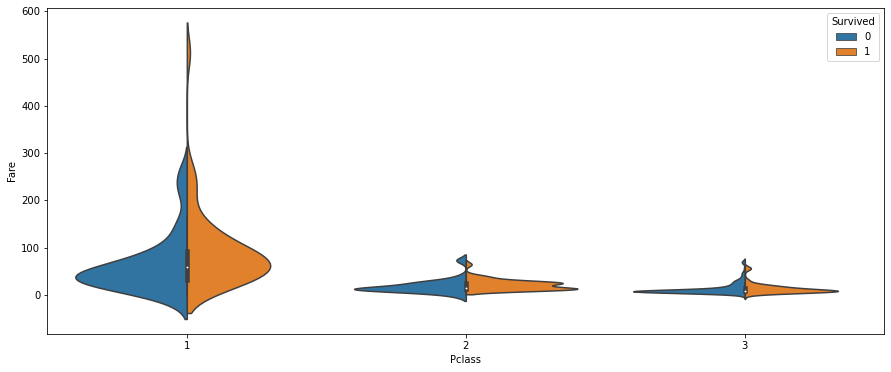

In [36]:
#看不出来规律，取对数试试
plt.figure(figsize=(15,6))
sns.violinplot(x='Pclass',y='Fare', hue='Survived', split=True, data=train)

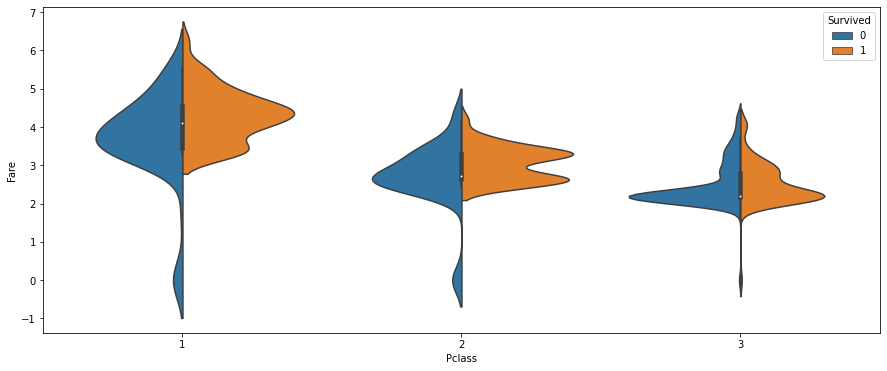

In [37]:
plt.figure(figsize=(15,6))
train['Fare']=train['Fare'].map(lambda x:np.log(x+1))
sns.violinplot(x='Pclass',y='Fare', hue='Survived', split=True, data=train)

价格越高，死亡人数随之减少

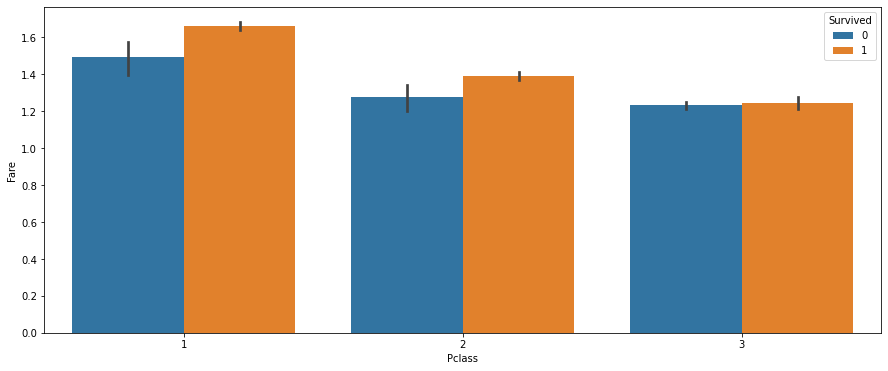

In [38]:
plt.figure(figsize=(15,6))
train['Fare']=train['Fare'].map(lambda x:np.log(x+1))
sns.barplot(x='Pclass',y='Fare', hue='Survived',data=train)

C:\Users\Administrator.000\anaconda3\envs\tf2\lib\site-packages\seaborn\categorical.py:2971: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


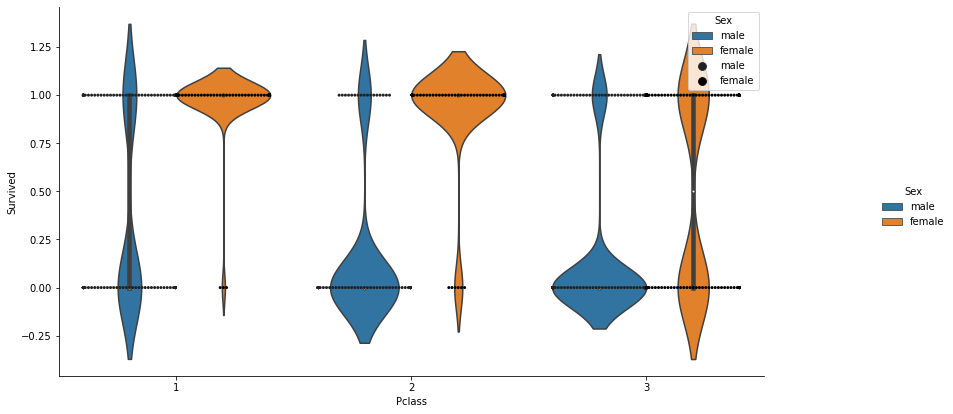

In [39]:
g = sns.catplot(x='Pclass', y='Survived',hue='Sex', kind='violin', data=train)      #看不出来        
#设置图片尺寸
g.fig.set_size_inches(15, 6) 
sns.swarmplot(x='Pclass', y='Survived', hue='Sex',color="k", split=True, size=3, data=train, ax=g.ax) 

船舱等级越高，死亡人数越少，女性乘客死亡率明显下降。

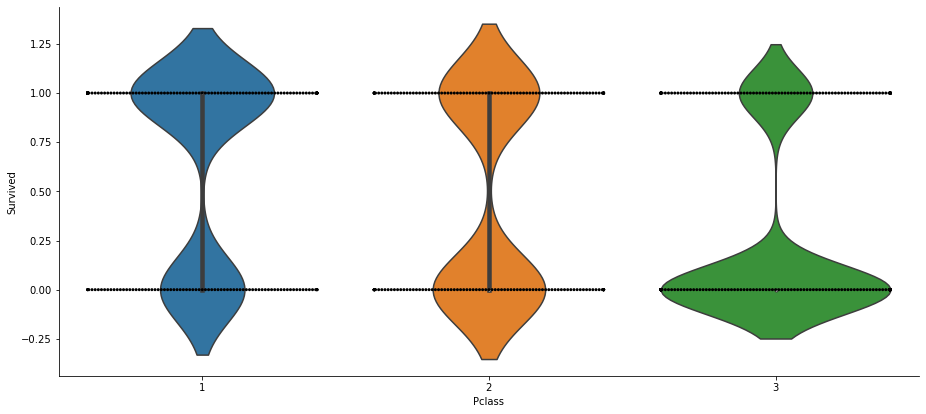

In [40]:
g = sns.catplot(x='Pclass', y='Survived', kind='violin', data=train)      #看不出来        
#设置图片尺寸
g.fig.set_size_inches(15, 6) 
sns.swarmplot(x='Pclass', y='Survived', color="k", size=3, data=train, ax=g.ax) 

船舱等级越高，死亡率越低

# Embarked与生存对比

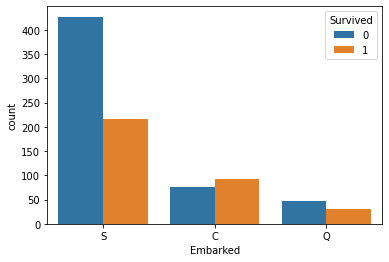

In [41]:
# Emabarked人群与生存对比
sns.countplot(x="Embarked", hue="Survived", data=train)

# Cabin—船舱的编号

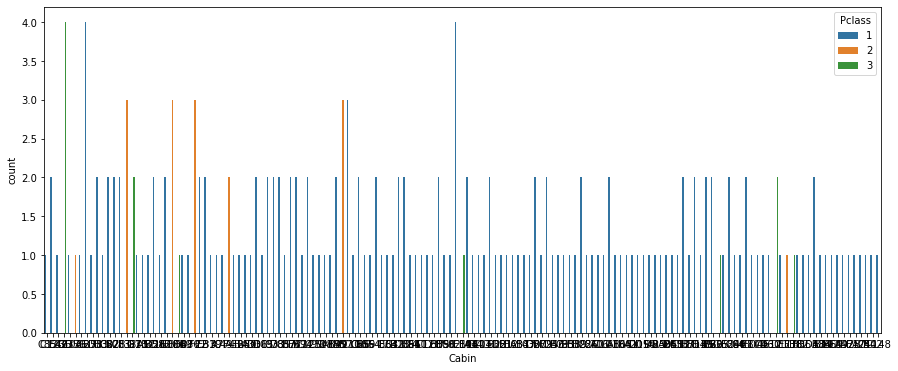

In [42]:
# 船舱编号-舱位对比
plt.figure(figsize=(15,6))
sns.countplot(x="Cabin", hue="Pclass", data=train)

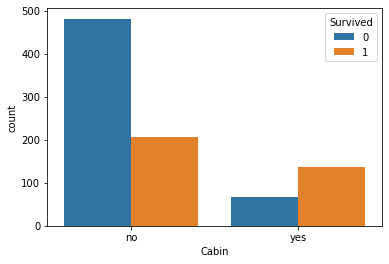

In [43]:
#有编号的为yes,没有的为no
train['Cabin']=train['Cabin'].map(lambda x:'yes' if type(x)==str else 'no')
#作图
sns.countplot(x="Cabin", hue="Survived", data=train)

有标记的生存率要高一些

从对数据可视化大概可以看到，女性乘客生存率比较高，小孩子的生存率比较高，船舱等级越高，生存率越高，同时对应的船票也越贵。